# COMP551 Mini Project 2 - IMDB Sentiment Analysis  
This is the codes of mini project2 - IMDB Sentiment Analysis.  

## AUTHORS
Pengnan Fan, ID#260768510  
Qifei Zhao, ID#260719382  

## TASKS
1. **Bernoulli Naive Bayes** (w/o any external library).  
2. **At least 2** out of 3 classifiers from the SciKit. i.e. suggestions: logistic regression, decision tree, or support vector machines  
3. **At least 2** different features extraction pipelines for processing the data. 
4. A model validation. i.e. **K-fold cross validation**  


## Task 0 - Preparation  
by Pengnan, Sherry, and Kaylee

### Task 0.1 - List of Packages Used

In [27]:
import pandas as pd
import glob
import sys
import time
import math
from time import sleep
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import numpy
import scipy
import sklearn.datasets
import contractions
from itertools import groupby
import string
import matplotlib
import matplotlib.pyplot as plt
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn import tree

### Task 0.2 - Data Loading Functions

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------------------#
# Please add your address here as string
ADDRESS_TRAIN_PENGNAN = "D:\\McGill\\19Fall\\COMP 551\\Projects\\Project2\\comp-551-imbd-sentiment-classification\\train"
ADDRESS_TEST_PENGNAN = "D:\\McGill\\19Fall\\COMP 551\\Projects\\Project2\\comp-551-imbd-sentiment-classification\\test"

#-------------------------------------------------------------------------------------------------------------------------------------------#
# @author Pengnan Fan
# @param address of train set
# @return a dict of list of dict
def loadData(address):
    print("Start loading negative set")
    neg = sklearn.datasets.load_files(address, categories={"neg"})
    print("Complete loading negative set")
    print("Start loading positive set")
    pos = sklearn.datasets.load_files(address, categories={"pos"})
    print("Complete loading postive set")
    
    negSet = list()
    count = 0
    size = len(neg.data)
    for x in neg.data:
        negSet.append({"comment":x.decode('utf-8'), "isPos":0})
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(size)) * 100)
        sys.stdout.write("Preparing negative set: [%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    
    print()
    
    posSet = list()
    count = 0
    size = len(pos.data)
    for x in pos.data:
        posSet.append({"comment":x.decode('utf-8'), "isPos":1})
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(size)) * 100)
        sys.stdout.write("Prepare positive set: [%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    
    output = {'pos':posSet, 'neg':negSet, 'all':posSet+negSet}
    print("\nFinish preparing")
    return output

#-------------------------------------------------------------------------------------------------------------------------------------------#
# Path
train_path="D:\\McGill\\19Fall\\COMP 551\\Projects\\Project2\\comp-551-imbd-sentiment-classification\\train"
test_path="D:\\McGill\\19Fall\\COMP 551\\Projects\\Project2\\comp-551-imbd-sentiment-classification\\test"

#-------------------------------------------------------------------------------------------------------------------------------------------#
# This function loads train data to a list
# @author
# @param class_name: either "pos" for loading positive data and otherwise loading negative data
# @return data: list of train data
def load_train(class_name):
    label=0
    if class_name is "pos":
        print("Start loading positive data")
        label=1
    else:
        print("Start loading negative data")
    data=[]
    count = 0
    lenW = 12500
    for file in glob.glob(train_path+"/"+class_name+"/*.txt"):
        f = open(file, "r")
        data.append([f.read(),label])
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    if class_name is "pos":
        print("\nComplete loading positive data")
    else:
        print("\nComplete loading negative data")
    return data

#-------------------------------------------------------------------------------------------------------------------------------------------#
# This function loads test data to a list
# @author
# @return data: list of test data
def load_test():
    data=[]
    print("Start loading test data")
    count = 0
    lenW = 25000
    for i in range(0,25000):
        file=test_path+"/"+str(i)+".txt"
        f = open(file, "r")
        data.append([f.read(),i])
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    print("\nComplete loading test data")
    return data

## Task 1 - Bernoulli Naive Bayes

### Task 1.1 - Bernoulli Naive Bayes

In [3]:
# @author Pengnan Fan
# @param dataSet: set for prediction
# @param wordExistance: dict {'pos' -> pos word existance, 'neg' -> neg word existance, 'all' -> all word existance}
# @param wordSet: list of unique words
# @param size: dict {'pos' -> pos size, 'neg' -> neg size, 'all' -> all size}
# @return prediction
def bernoulliNaiveBayes(dataSet, wordExistance, wordSet, size):
    pPos = size['pos']/size['all']
    pNeg = size['neg']/size['all']
    prediction = list()
    count = 0
    lenW = len(dataSet)
    print("Start Bernoulli naive Bayes classifying")
    for exp in dataSet:
        #pPos_x = numpy.log([pPos])
        #pNeg_x = numpy.log([pNeg])
        
        pred = numpy.log([pPos/nNeg])
        
        # Calculating P(Y|X)
        for word in wordSet:
            pos = 0
            neg = 0
            
            if word in exp:
                pos = (wordExistance['pos'][word]+1)/(size['pos']+2)
                neg = (wordExistance['neg'][word]+1)/(size['neg']+2)
            else:
                pos = 1 - ((wordExistance['pos'][word]+1)/(size['pos']+2))
                neg = 1 - ((wordExistance['neg'][word]+1)/(size['neg']+2))
            
            #pPos_x += numpy.log([pos])
            #pNeg_x += numpy.log([neg])
            pred+=numpy.log([pos])
        
        # Logistic decision boundary
        #log_ratio = pPos_x - pNeg_x
        
        if pred > 0:
            prediction.append(1)
        else:
            prediction.append(0)
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    
    print("\nComplete Bernoulli naive Bayes classifying")
    
    return prediction

### Task 1.2 - Evaluation

In [4]:
# @author Pengnan Fan
# @param dataSet: train set with label
# @param prediction: prediction of each example in the trainSet
# @return result: list of results: {TP: true pos, TN: true neg, FP: false pos, FN: false neg}
def evaluation(dataSet, prediction):
    size = len(prediction)
    count = 0
    result = {'TP':0,'TN':0,'FP':0,'FN':0}
    
    print("Start evaluating classification")
    for i in range(size):
        if prediction[i]==1:
            if dataSet[i]['isPos']==1:
                result['TP']+=1
            else:
                result['FP']+=1
        else:
            if dataSet[i]['isPos']==1:
                result['FN']+=1
            else:
                result['TN']+=1
                
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(size)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    print("\nComplete evaluating classification")
    return result

## Task 2 - Logistic Regression, Support Vector Machine, and Decision Tree  
by Sherry and Kaylee

### Task 2.1 - Logistic Regression

In [8]:
# (train_data, 0.8, 0.2, True, False, 1, 3, 100)
def LogReg(train_data, train_ratio, test_ratio, random, tfidf, minN, maxN, c):
    train_set,valid_set=sklearn.model_selection.train_test_split(train_data,train_size=train_ratio,test_size=test_ratio,shuffle=random)
    train_x=[comment[0] for comment in train_set]
    train_y=[comment[1] for comment in train_set]
    valid_x=[comment[0] for comment in valid_set]
    valid_y=[comment[1] for comment in valid_set]
    
    vectorizer = CountVectorizer(ngram_range=(minN, maxN))
    X = vectorizer.fit_transform(train_x)
    
    tfidf_transformer = TfidfTransformer(use_idf=tfidf)
    X=tfidf_transformer.fit_transform(X)
    
    lg=LogisticRegression(C=c)
    start_learn = time.time()
    lg.fit(X,train_y)
    end_learn = time.time()
    #result = sklearn.model_selection.cross_validate(lg, X, y_train, cv=5, return_train_score=True)
    x_v=vectorizer.transform(valid_x)
    start_pred = time.time()
    y_pred = lg.predict(x_v)
    end_pred = time.time()
    
    score = sklearn.metrics.accuracy_score(valid_y, y_pred)
    print ("LR Accuracy: ", score)
    print ("Learning Running Time: ", end_learn - start_learn, "seconds")
    print ("Predicting Running Time: ", end_pred - start_pred, "seconds")
    return score
    
    '''
    print ("LR Train Accuracy = ", result['train_score'])
    print("Avg Train Accuracy = ", numpy.mean(result['train_score']))
    print ("LR Cross Validation Accuracy = ", result['test_score'])
    print("Avg Validation Accuracy = ", numpy.mean(result['test_score']))
    '''

### Task 2.2 Support Vector Machine

In [22]:
def SVM(train_data, train_ratio, test_ratio, random, tfidf, minN, maxN, c):
    train_set,valid_set=sklearn.model_selection.train_test_split(train_data,train_size=train_ratio,test_size=test_ratio,shuffle=random)
    train_x=[comment[0] for comment in train_set]
    train_y=[comment[1] for comment in train_set]
    valid_x=[comment[0] for comment in valid_set]
    valid_y=[comment[1] for comment in valid_set]
    
    vectorizer = CountVectorizer(ngram_range=(minN, maxN))
    X = vectorizer.fit_transform(train_x)
    
    tfidf_transformer = TfidfTransformer(use_idf=tfidf)
    X=tfidf_transformer.fit_transform(X)
    
    
    clf=SVC(kernel='linear', C=c)
    start_learn = time.time()
    clf.fit(X,train_y)
    end_learn = time.time()
    x_v=vectorizer.transform(valid_x)
    start_pred = time.time()
    y_pred=clf.predict(x_v)
    end_pred = time.time()
    score = sklearn.metrics.accuracy_score(valid_y, y_pred)
    print ("SVM Accuracy: ", score)
    print ("Learning Running Time: ", end_learn - start_learn, "seconds")
    print ("Predicting Running Time: ", end_pred - start_pred, "seconds")
    return score
    #result = sklearn.model_selection.cross_validate(clf, X, y_train, cv=5, return_train_score=True)
    '''
    print ("SVM Train Accuracy = ", result['train_score'])
    print("Avg Train Accuracy = ", numpy.mean(result['train_score']))
    print ("SVM Cross Validation Accuracy = ", result['test_score'])
    print("Avg Validation Accuracy = ", numpy.mean(result['test_score']))
    '''

### Task 2.3 Decision Tree

In [33]:
def DecTree(train_data, train_ratio, test_ratio, random, tfidf, minN, maxN):
    train_set,valid_set=sklearn.model_selection.train_test_split(train_data,train_size=train_ratio,test_size=test_ratio,shuffle=random)
    train_x=[comment[0] for comment in train_set]
    train_y=[comment[1] for comment in train_set]
    valid_x=[comment[0] for comment in valid_set]
    valid_y=[comment[1] for comment in valid_set]
    
    
    vectorizer = CountVectorizer(ngram_range=(minN, maxN))
    X = vectorizer.fit_transform(train_x)
    
    tfidf_transformer = TfidfTransformer(use_idf=tfidf)
    X=tfidf_transformer.fit_transform(X)
     

    dt = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,max_leaf_nodes=300,min_samples_split=2)
    start_learn = time.time()
    dt.fit(X, train_y)
    end_learn = time.time()
    x_v=vectorizer.transform(valid_x)
    start_pred = time.time()
    y_pred = dt.predict(x_v)
    end_pred = time.time()
    score = sklearn.metrics.accuracy_score(valid_y, y_pred)
    print ("Decision Tree Accuracy: ", score)
    print ("Learning Running Time: ", end_learn - start_learn, "seconds")
    print ("Predicting Running Time: ", end_pred - start_pred, "seconds")
    return score

## Task 3 - Feature Extraction Pipelines

### Task 3.1 - Word Frequency without Stopword

In [11]:
# @author Pengnan Fan
# @acknowledgement Yuxiang Ma, for this function is edited based on his in miniproject1
# @param dataSet: set of comments
# @return naiveCount: word frequency without stopwords
def wordsFrequencyStopword(dataSet):
    stopwordCount = dict()
    totalString = str()
    count = 0
    lenW = len(dataSet['pos'])
    
    print("Start counting naive word frequency of positive set")
    
    for comment in dataSet['pos']:
        totalString = totalString + ' ' + comment['comment'].lower()
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    
    tokenizer = RegexpTokenizer(r'\w+')
    withoutPunc = tokenizer.tokenize(totalString)
    stopwordsSet = set(stopwords.words())
    posCountDict = Counter(s.lower() for s in withoutPunc if s.lower() not in stopwordsSet)
    print("\nComplete counting naive word frequency of positive set")
    
    totalString = str()
    count = 0
    lenW = len(dataSet['neg'])
    
    print("Start counting naive word frequency of negative set")
    
    for comment in dataSet['neg']:
        totalString = totalString + ' ' + comment['comment'].lower()
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    
    tokenizer = RegexpTokenizer(r'\w+')
    withoutPunc = tokenizer.tokenize(totalString)
    stopwordsSet = set(stopwords.words())
    negCountDict = Counter(s.lower() for s in withoutPunc if s.lower() not in stopwordsSet)
    print("\nComplete counting naive word frequency of negative set")
    
    totalString = str()
    count = 0
    lenW = len(dataSet['all'])
    
    print("Start counting naive word frequency of all set")
    
    for comment in dataSet['all']:
        totalString = totalString + ' ' + comment['comment'].lower()
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    
    tokenizer = RegexpTokenizer(r'\w+')
    withoutPunc = tokenizer.tokenize(totalString)
    stopwordsSet = set(stopwords.words())
    allCountDict = Counter(s.lower() for s in withoutPunc if s.lower() not in stopwordsSet)
    print("\nComplete counting naive word frequency of all set")
    
    stopwordCount = {'pos':posCountDict, 'neg':negCountDict, 'all':allCountDict}
    
    return stopwordCount

### Task 3.2 - Number of Naive Existance of Words

In [12]:
# @author Pengnan Fan
# @param dataSet: set of comments
# @return naiveCount: list of words of num of naive existances
def numOfExistanceNaive(dataSet):
    naiveCount = dict()
    totalComments = []
    count = 0
    lenW = len(dataSet['pos'])
    
    print("Start counting number of naive word existance of positive set")
    for comment in dataSet['pos']:
        commentSplit = comment['comment'].lower().split(" ")
        wordsToAdd = []
        for word in commentSplit:
            if word not in wordsToAdd:
                wordsToAdd.append(word)
        totalComments+=wordsToAdd
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    
    posCount = Counter(x for x in totalComments)
    print("\nComplete counting number of naive word existance of positive set")
    
    totalComments = []
    count = 0
    lenW = len(dataSet['neg'])
    
    print("Start counting number of naive word existance of negative set")
    for comment in dataSet['neg']:
        commentSplit = comment['comment'].lower().split(" ")
        wordsToAdd = []
        for word in commentSplit:
            if word not in wordsToAdd:
                wordsToAdd.append(word)
        totalComments+=wordsToAdd
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
        
    negCount = Counter(x for x in totalComments)
    print("\nComplete counting number of naive word existance of negative set")
    
    totalComments = []
    count = 0
    lenW = len(dataSet['all'])
    
    print("Start counting number of naive word existance of all set")
    for comment in dataSet['all']:
        commentSplit = comment['comment'].lower().split(" ")
        wordsToAdd = []
        for word in commentSplit:
            if word not in wordsToAdd:
                wordsToAdd.append(word)
        totalComments+=wordsToAdd
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
        
    allCount = Counter(x for x in totalComments)
    print("\nComplete counting number of naive word existance of all set")
    
    naiveCount = {'pos':posCount, 'neg':negCount, 'all':allCount}
    
    return naiveCount

### Task 3.3.1 - Number of Existance of Words without Stopwords, Duplicates, and with Stemmer

In [13]:
# @author Pengnan Fan
# @param dataSet: set of comments
# @return naiveCount: list of num of existances of words without stopwords, duplicates, and with stemmer
def advancedNumOfExistance(dataSet):
    ps = PorterStemmer()
    countDict = dict()
    stopwordsSet = set(stopwords.words())
    stopwordsSet.add('br')
    
    wordSet = list()
    count = 0
    lenW = len(dataSet['pos'])
    
    print("Start counting number of words without stopwords of existance of positive set")
    for exp in dataSet['pos']: 
        comment = contractions.fix(exp['comment'].lower())
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        processedComment = []
        
        for word in sent_clean.split():
            word = ps.stem(word)
            if word not in processedComment:
                processedComment.append(word)
                
        wordSet+=processedComment
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
        
    posDict = Counter(s for s in wordSet if s not in stopwordsSet)
    
    print("\nComplete counting number of words without stopwords of existance of positive set")
    
    wordSet = list()
    count = 0
    lenW = len(dataSet['neg'])
    
    print("Start counting number of words without stopwords of existance of negative set")
    for exp in dataSet['neg']: 
        comment = contractions.fix(exp['comment'].lower())
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        processedComment = []
        
        for word in sent_clean.split():
            word = ps.stem(word)
            if word not in processedComment:
                processedComment.append(word)
                
        wordSet+=processedComment
            
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    
    negDict = Counter(s for s in wordSet if s not in stopwordsSet)
    
    print("\nComplete counting number of words without stopwords of existance of negative set")
    
    wordSet = list()
    count = 0
    lenW = len(dataSet['all'])
    
    print("Start counting number of words without stopwords of existance of all set")
    for exp in dataSet['all']: 
        comment = contractions.fix(exp['comment'].lower())
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        processedComment = []
        
        for word in sent_clean.split():
            word = ps.stem(word)
            if word not in processedComment:
                processedComment.append(word)
                
        wordSet+=processedComment
            
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1     
    
    allDict = Counter(s for s in wordSet if s not in stopwordsSet)
    
    print("\nComplete counting number of words without stopwords of existance of all set")
    
    countDict = {'neg':negDict, 'pos':posDict, 'all':allDict}
    
    return countDict

### Task 3.3.2 - With Duplicates

In [14]:
# @author Pengnan Fan
# @param dataSet: set of comments
# @return naiveCount: list of num of existances of words without stopwords and with stemmer
def advancedNumOfExistanceWithDuplicates(dataSet):
    output = dict()
    countDict = dict()
    stopwordsSet = set(stopwords.words())
    stopwordsSet.add('br')
    
    wordSet = list()
    count = 0
    lenW = len(dataSet['pos'])
    eachFreqPos = list()
    
    print("Start counting number of words without stopwords of existance of positive set")
    for exp in dataSet['pos']: 
        comment = contractions.fix(exp['comment'].lower())
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        # processedComment = ([k for k, v in groupby(sent_clean.split())])
        
        wordSet+=sent_clean.split()
        
        temp_pos = Counter(s for s in sent_clean.split() if s not in stopwordsSet)
        
        eachFreqPos.append(temp_pos)
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
        
    posDict = Counter(s for s in wordSet if s not in stopwordsSet)
    
    print("\nComplete counting number of words without stopwords of existance of positive set")
    
    wordSet = list()
    count = 0
    lenW = len(dataSet['neg'])
    eachFreqNeg = list()
    
    print("Start counting number of words without stopwords of existance of negative set")
    for exp in dataSet['neg']: 
        comment = contractions.fix(exp['comment'].lower())
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        # processedComment = ([k for k, v in groupby(sent_clean.split())])
                
        wordSet+=sent_clean.split()
        
        temp_neg = Counter(s for s in sent_clean.split() if s not in stopwordsSet)
        
        eachFreqNeg.append(temp_neg)
            
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    
    negDict = Counter(s for s in wordSet if s not in stopwordsSet)
    
    print("\nComplete counting number of words without stopwords of existance of negative set")
    
    wordSet = list()
    count = 0
    lenW = len(dataSet['all'])
    
    print("Start counting number of words without stopwords of existance of all set")
    for exp in dataSet['all']: 
        comment = contractions.fix(exp['comment'].lower())
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        # processedComment = ([k for k, v in groupby(sent_clean.split())])
        
        wordSet+=sent_clean.split()
            
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1     
    
    allDict = Counter(s for s in wordSet if s not in stopwordsSet)
    
    print("\nComplete counting number of words without stopwords of existance of all set")
    
    countDict = {'neg':negDict, 'pos':posDict, 'all':allDict}
    
    eachFreq = eachFreqPos+eachFreqNeg
    
    output = {'allFreq':countDict, 'individual':eachFreq}
    
    return output

### Task 3.3.3 - Number of Existance of N-gram Words without Stopwords, Duplicates and with Stemmer

In [15]:
# @author Pengnan Fan
# @param dataSet: set of comments
# @param n: used for n-gram
# @return countDict: list of num of existances of words without stopwords, duplicates and with stemmer
def nGram(dataSet, n):
    ps = PorterStemmer()
    countDict = dict()
    stopwordsSet = set(stopwords.words())
    stopwordsSet.add('br')
    
    wordSet = list()
    count = 0
    lenW = len(dataSet['pos'])
    
    print("Start counting number of ", n, "-grams without duplicates of positive set")
    for exp in dataSet['pos']: 
        comment = contractions.fix(exp['comment'].lower())
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        withoutStopwords = list()
        for x in sent_clean.split():
            if x not in stopwordsSet:
                withoutStopwords.append(ps.stem(x))
        bi = list(nltk.ngrams(withoutStopwords, n))
        processedComment = []
        
        for word in bi:
            if word not in processedComment:
                processedComment.append(word)
                
        wordSet+=processedComment
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
        
    posDict = Counter(s for s in wordSet)
    
    print("\nComplete counting number of ", n, "-grams without duplicates of positive set")
    
    wordSet = list()
    count = 0
    lenW = len(dataSet['neg'])
    
    print("Start counting number of ", n, "-grams without duplicates of negative set")
    for exp in dataSet['neg']: 
        comment = contractions.fix(exp['comment'].lower())
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        withoutStopwords = list()
        for x in sent_clean.split():
            if x not in stopwordsSet:
                withoutStopwords.append(ps.stem(x))
        bi = list(nltk.ngrams(withoutStopwords, n))
        processedComment = []
        
        for word in bi:
            if word not in processedComment:
                processedComment.append(word)
                
        wordSet+=processedComment
            
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    
    negDict = Counter(s for s in wordSet)
    
    print("\nComplete counting number of ", n, "-grams without duplicates of negative set")
    
    wordSet = list()
    count = 0
    lenW = len(dataSet['all'])
    
    print("Start counting number of ", n, "-grams without duplicates of all set")
    for exp in dataSet['all']: 
        comment = contractions.fix(exp['comment'].lower())
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        withoutStopwords = list()
        for x in sent_clean.split():
            if x not in stopwordsSet:
                withoutStopwords.append(ps.stem(x))
        bi = list(nltk.ngrams(withoutStopwords, n))
        processedComment = []
        
        for word in bi:
            if word not in processedComment:
                processedComment.append(word)
                
        wordSet+=processedComment
            
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1     
    
    allDict = Counter(s for s in wordSet)
    
    print("\nCounting counting number of ", n, "-grams without duplicates of all set")
    
    countDict = {'neg':negDict, 'pos':posDict, 'all':allDict}
    
    return countDict

### Task 3.3.4 - CountAllWords

In [16]:
# @author Pengnan Fan
# @param dataSet: set used to learn
# @return output: list of unique words shown in dataSet
def allWords(dataSet):
    output = list()
    lenW = len(dataSet)
    count = 0
    print("Start counting all words")
    for comments in dataSet:
        for word in comments:
            if word not in output:
                output.append(word)
                
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
        
    print("\nComplete counting all words")
    return output

### Task 3.4 - Data Standardization and Clean-up Data

In [17]:
# @author Pengnan Fan
# @param dataSet:comment data need to be proceed
# @return proceedData
def dataStandardization(dataSet):
    proceedData = list()
    stopwordsSet = set(stopwords.words())
    stopwordsSet.add('br')
    
    count = 0
    lenW = len(dataSet)
    
    print("Start proceeding data")
    for data in dataSet: 
        comment = contractions.fix(data['comment'].lower())
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        processedComment = sent_clean.split()
        toAdd = list()
        for x in processedComment:
            if x not in stopwordsSet and x not in toAdd:
                toAdd.append(x)
                
        proceedData.append(toAdd)
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
        
    print("\nComplete proceeding data")
    return proceedData

#-------------------------------------------------------------------------------------------------------------------------------------------#
# @author Pengnan
# @param dataSet:set of data with comments
# @return extendedSentence:set of comments without abbr. i.e. it's -> it is
def extendSentences(dataSet):
    extenedSentence = list()
    count = 0
    lenW = len(dataSet)
    print("Start extending sentences")
    for data in dataSet:
        extenedSentence.append([contractions.fix(data[0].lower()),data[1]])
        
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    print("\nComplete extending sentences")
    return extenedSentence
#-------------------------------------------------------------------------------------------------------------------------------------------#
# @author Pengnan
def removePunctuationAndStopwords(dataSet, additionalStopwords=[]):
    clean = list()
    count = 0
    lenW = len(dataSet)
    stopwordsSet = set(stopwords.words())
    print("Start removing punctuation and stopwords")
    for data in dataSet:
        comment = data[0].lower()
        sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
        sent_clean = comment.translate(sent_map)
        processedComment = sent_clean.split()
        fixed = str()
        for word in processedComment:
            if word not in stopwordsSet and word not in additionalStopwords:
                fixed = fixed + " " + word
        clean.append([fixed,data[1]])
    
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    print("\nComplete removing punctuation and stopwords")
    return clean

#-------------------------------------------------------------------------------------------------------------------------------------------#
def lemmatize(dataSet):
    processed = list()
    lemm = WordNetLemmatizer()
    count = 0
    lenW = len(dataSet)
    print("Start lemmatizing")
    for data in dataSet:
        words = word_tokenize(data[0]) # word_tokenize() takes care of stripping too.
        clean_text = str()
        for word in words:
            w = lemm.lemmatize(word)
            clean_text += w + " "
        processed.append([clean_text, data[1]])
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    print("\nComplete lemmatizing")
    return processed
#-------------------------------------------------------------------------------------------------------------------------------------------#
def removeDuplicates(dataSet):
    processed = list()
    lemm = WordNetLemmatizer()
    count = 0
    lenW = len(dataSet)
    print("Start removing duplicates")
    for data in dataSet:
        words = word_tokenize(data[0]) # word_tokenize() takes care of stripping too.
        noDup = list()
        for word in words:
            if word not in noDup:
                noDup.append(word)
                
        clean_text = str()
        for w in noDup:
            clean_text = clean_text + " " + w
        processed.append([clean_text, data[1]])
        # This is for loading bar
        sys.stdout.write('\r')
        c = int((float(count) / float(lenW)) * 100)
        sys.stdout.write("[%-20s] %d%%" % ('='*int(c / 5), c))
        sleep(0.001)
        sys.stdout.flush()
        count += 1
    print("\nComplete removing duplicates")
    return processed
#-------------------------------------------------------------------------------------------------------------------------------------------#
# @author Qifei, Pengnan
# @param text: a string of comment
# @param custom_stopwords:list of additional stopwords
# @return clean_txt: a string of clean-up comment
def cleanUp(text, custom_stopwords=[]):
    # Initilaise Lemmatizer object:
    lemm = WordNetLemmatizer()
    
    # Extend words
    comment = contractions.fix(text.lower())
    sent_map = comment.maketrans(dict.fromkeys(string.punctuation))
    sent_clean = comment.translate(sent_map)
    
    # Load NLTK stopwords:
    my_stopwords = stopwords.words('english') + custom_stopwords
    
    clean_text = ''
    
    words = word_tokenize(sent_clean) # word_tokenize() takes care of stripping too.
    
    for word in words:
        w = lemm.lemmatize(w)
        if w not in my_stopwords and len(w)>2:
            clean_text += w + " "
    
    return clean_text

#-------------------------------------------------------------------------------------------------------------------------------------------#
# @author
# @param dataset: list of comments
def cleanUp_data(dataset):
    for i in range(0,len(dataset)):
        comment=cleanUp(dataset[i][0])
        dataset[i][0]=comment

## 4 Validation

In [18]:
def crossValidation(mode, X,y_train, fold, c, train_score):
    if mode is "LR":
        lg=LogisticRegression(C=c)
        lg.fit(X,y_train)
        result = sklearn.model_selection.cross_validate(lg, X,y_train, cv=fold, return_train_score=train_score)
        print ("Logistic Regression Train Accuracy = ", result['train_score'])
        print("Avg Train Accuracy = ", numpy.mean(result['train_score']))
        print ("Logistic Regression Cross Validation Accuracy = ", result['test_score'])
        print("Avg Validation Accuracy = ", numpy.mean(result['test_score']))
        return result
    
    elif mode is "SVM":
        clf=SVC(kernel='linear', C=c)
        clf.fit(X,y_train)
        result = sklearn.model_selection.cross_validate(clf, X, y_train, cv=fold, return_train_score=train_score)
        print ("SVM Train Accuracy = ", result['train_score'])
        print("Avg Train Accuracy = ", numpy.mean(result['train_score']))
        print ("SVM Cross Validation Accuracy = ", result['test_score'])
        print("Avg Validation Accuracy = ", numpy.mean(result['test_score']))
        return result
    elif mode is "DT":
        dt = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,max_leaf_nodes=300,min_samples_split=2)
        dt.fit(X, y_train)
        result = sklearn.model_selection.cross_validate(dt, X, y_train, cv=fold, return_train_score=train_score)
    else:
        print("INVALID INPUTS")
    

# Test Results

## 1. Preparing train set and test set

In [19]:
train_data=load_train("pos")+load_train("neg")
test_data=load_test()

Start loading positive data
[=================== ] 99%
Complete loading positive data
Start loading negative data
[=================== ] 99%
Complete loading negative data
Start loading test data
[=================== ] 99%
Complete loading test data


## 2. Selecting Model Based on Accuracy and Runing Time

In [20]:
LogReg(train_data, 0.8, 0.2, True, False, 1, 1, 1.0)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Accuracy:  0.8502
Learning Running Time:  1.4989209175109863 seconds
Predicting Running Time:  0.004904508590698242 seconds


0.8502

In [23]:
SVM(train_data, 0.8, 0.2, True, False, 1, 1, 1.0)

SVM Accuracy:  0.8812
Learning Running Time:  341.59919571876526 seconds
Predicting Running Time:  84.45325541496277 seconds


0.8812

In [34]:
DecTree(train_data, 0.8, 0.2, True, False, 1, 1)

Decision Tree Accuracy:  0.6848
Learning Running Time:  10.170814037322998 seconds
Predicting Running Time:  0.006982088088989258 seconds


0.6848

In [52]:
def selectRegularizationParameter(mode, dataSet, minN, maxN, cv, tfidf, cMin, cMax):
    train_x=[comment[0] for comment in dataSet]
    train_y=[comment[1] for comment in dataSet]
    output = list()
    bestScore = 0
    bestParameter = 0
    
    vectorizer = CountVectorizer(ngram_range=(minN, maxN))
    X = vectorizer.fit_transform(train_x)
    
    tfidf_transformer = TfidfTransformer(use_idf=tfidf)
    X=tfidf_transformer.fit_transform(X)
    for i in range(cMin,cMax):
        print("< Cross Validation", 10**i, ">")
        result = crossValidation(mode, X,train_y, cv, 10**i, True)
        score = numpy.mean(result['test_score'])
        output.append([score])
    return output

In [55]:
LR_C_Uni = selectRegularizationParameter("LR", train_data, 1, 1, 5, False, -3, 4)

< Cross Validation 0.001 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.6759  0.67935 0.6752  0.67605 0.67585]
Avg Train Accuracy =  0.67647
Logistic Regression Cross Validation Accuracy =  [0.6838 0.6676 0.669  0.661  0.6746]
Avg Validation Accuracy =  0.6712
< Cross Validation 0.01 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.7073  0.70955 0.7077  0.7073  0.7081 ]
Avg Train Accuracy =  0.70799
Logistic Regression Cross Validation Accuracy =  [0.7152 0.6986 0.702  0.6922 0.7016]
Avg Validation Accuracy =  0.7019200000000001
< Cross Validation 0.1 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.7964  0.79405 0.7972  0.7959  0.7948 ]
Avg Train Accuracy =  0.7956700000000001
Logistic Regression Cross Validation Accuracy =  [0.7882 0.7854 0.7812 0.7804 0.7828]
Avg Validation Accuracy =  0.7836000000000001
< Cross Validation 1 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.87515 0.87805 0.87735 0.87565 0.87645]
Avg Train Accuracy =  0.87653
Logistic Regression Cross Validation Accuracy =  [0.8506 0.8454 0.8444 0.844  0.8518]
Avg Validation Accuracy =  0.84724
< Cross Validation 10 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.93995 0.941   0.9409  0.9396  0.9383 ]
Avg Train Accuracy =  0.93995
Logistic Regression Cross Validation Accuracy =  [0.8714 0.8582 0.8566 0.8636 0.8744]
Avg Validation Accuracy =  0.8648399999999998
< Cross Validation 100 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.9906  0.9919  0.99185 0.99155 0.99035]
Avg Train Accuracy =  0.99125
Logistic Regression Cross Validation Accuracy =  [0.8604 0.8326 0.8412 0.856  0.8626]
Avg Validation Accuracy =  0.8505600000000001
< Cross Validation 1000 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [1.      1.      0.99995 0.99995 1.     ]
Avg Train Accuracy =  0.9999800000000001
Logistic Regression Cross Validation Accuracy =  [0.8468 0.816  0.8246 0.8384 0.8522]
Avg Validation Accuracy =  0.8356


In [56]:
LR_C_Bi = selectRegularizationParameter("LR", train_data, 2, 2, 5, False, -3, 4)

< Cross Validation 0.001 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.6846  0.68635 0.68665 0.68405 0.68395]
Avg Train Accuracy =  0.68512
Logistic Regression Cross Validation Accuracy =  [0.6748 0.678  0.6572 0.667  0.6528]
Avg Validation Accuracy =  0.6659599999999999
< Cross Validation 0.01 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.71655 0.71825 0.71615 0.7131  0.71305]
Avg Train Accuracy =  0.71542
Logistic Regression Cross Validation Accuracy =  [0.7028 0.7046 0.6872 0.6936 0.6768]
Avg Validation Accuracy =  0.693
< Cross Validation 0.1 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.81565 0.81835 0.8175  0.816   0.8137 ]
Avg Train Accuracy =  0.81624
Logistic Regression Cross Validation Accuracy =  [0.7862 0.7826 0.7672 0.7694 0.7676]
Avg Validation Accuracy =  0.7746
< Cross Validation 1 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.9329  0.9363  0.93415 0.9335  0.9337 ]
Avg Train Accuracy =  0.9341100000000001
Logistic Regression Cross Validation Accuracy =  [0.8456 0.836  0.8378 0.8404 0.8388]
Avg Validation Accuracy =  0.83972
< Cross Validation 10 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.99915 0.99885 0.99885 0.9989  0.99905]
Avg Train Accuracy =  0.99896
Logistic Regression Cross Validation Accuracy =  [0.868  0.848  0.8552 0.8642 0.8636]
Avg Validation Accuracy =  0.8598000000000001
< Cross Validation 100 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [1. 1. 1. 1. 1.]
Avg Train Accuracy =  1.0
Logistic Regression Cross Validation Accuracy =  [0.8702 0.8502 0.8568 0.8664 0.8636]
Avg Validation Accuracy =  0.86144
< Cross Validation 1000 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [1. 1. 1. 1. 1.]
Avg Train Accuracy =  1.0
Logistic Regression Cross Validation Accuracy =  [0.8688 0.85   0.8578 0.8662 0.8648]
Avg Validation Accuracy =  0.86152


In [57]:
LR_C_Tri = selectRegularizationParameter("LR", train_data, 3, 3, 5, False, -3, 4)

< Cross Validation 0.001 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.8591  0.8583  0.85695 0.8574  0.85065]
Avg Train Accuracy =  0.85648
Logistic Regression Cross Validation Accuracy =  [0.7268 0.733  0.7176 0.72   0.7014]
Avg Validation Accuracy =  0.7197600000000001
< Cross Validation 0.01 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.86535 0.86375 0.8619  0.8614  0.85775]
Avg Train Accuracy =  0.8620300000000001
Logistic Regression Cross Validation Accuracy =  [0.729  0.739  0.7166 0.722  0.7024]
Avg Validation Accuracy =  0.7218
< Cross Validation 0.1 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.9001  0.8997  0.89715 0.8955  0.8924 ]
Avg Train Accuracy =  0.8969700000000002
Logistic Regression Cross Validation Accuracy =  [0.7454 0.7552 0.7412 0.739  0.7252]
Avg Validation Accuracy =  0.7412
< Cross Validation 1 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.98035 0.98145 0.9811  0.9785  0.97925]
Avg Train Accuracy =  0.9801300000000002
Logistic Regression Cross Validation Accuracy =  [0.7958 0.7972 0.7884 0.7874 0.7808]
Avg Validation Accuracy =  0.7899200000000001
< Cross Validation 10 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [1. 1. 1. 1. 1.]
Avg Train Accuracy =  1.0
Logistic Regression Cross Validation Accuracy =  [0.818  0.8134 0.8162 0.8124 0.8166]
Avg Validation Accuracy =  0.81532
< Cross Validation 100 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [1. 1. 1. 1. 1.]
Avg Train Accuracy =  1.0
Logistic Regression Cross Validation Accuracy =  [0.8206 0.8154 0.8224 0.8202 0.8242]
Avg Validation Accuracy =  0.8205600000000001
< Cross Validation 1000 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [1. 1. 1. 1. 1.]
Avg Train Accuracy =  1.0
Logistic Regression Cross Validation Accuracy =  [0.8218 0.8162 0.8264 0.8224 0.826 ]
Avg Validation Accuracy =  0.82256


In [58]:
LR_C_Uni_Bi = selectRegularizationParameter("LR", train_data, 1, 2, 5, False, -3, 4)

< Cross Validation 0.001 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.67985 0.68155 0.67915 0.67695 0.67765]
Avg Train Accuracy =  0.67903
Logistic Regression Cross Validation Accuracy =  [0.6872 0.672  0.6662 0.6642 0.6752]
Avg Validation Accuracy =  0.67296
< Cross Validation 0.01 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.7103  0.7122  0.7108  0.709   0.71045]
Avg Train Accuracy =  0.7105500000000001
Logistic Regression Cross Validation Accuracy =  [0.7164 0.7014 0.7016 0.6946 0.7028]
Avg Validation Accuracy =  0.70336
< Cross Validation 0.1 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.8045  0.8028  0.80375 0.80375 0.80185]
Avg Train Accuracy =  0.8033300000000001
Logistic Regression Cross Validation Accuracy =  [0.7936 0.7892 0.783  0.7814 0.788 ]
Avg Validation Accuracy =  0.78704
< Cross Validation 1 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.89885 0.89945 0.89895 0.89735 0.89665]
Avg Train Accuracy =  0.89825
Logistic Regression Cross Validation Accuracy =  [0.8584 0.8506 0.85   0.8506 0.859 ]
Avg Validation Accuracy =  0.85372
< Cross Validation 10 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.98095 0.9829  0.98255 0.98225 0.98175]
Avg Train Accuracy =  0.9820800000000001
Logistic Regression Cross Validation Accuracy =  [0.8794 0.8688 0.8704 0.8746 0.882 ]
Avg Validation Accuracy =  0.8750399999999999
< Cross Validation 100 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [1. 1. 1. 1. 1.]
Avg Train Accuracy =  1.0
Logistic Regression Cross Validation Accuracy =  [0.8822 0.8648 0.8726 0.8782 0.8822]
Avg Validation Accuracy =  0.876
< Cross Validation 1000 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [1. 1. 1. 1. 1.]
Avg Train Accuracy =  1.0
Logistic Regression Cross Validation Accuracy =  [0.881  0.8614 0.8702 0.8764 0.8812]
Avg Validation Accuracy =  0.8740399999999999


In [59]:
LR_C_Uni_Bi = selectRegularizationParameter("LR", train_data, 1, 3, 5, False, -3, 4)

< Cross Validation 0.001 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.67925 0.68015 0.6781  0.67565 0.6751 ]
Avg Train Accuracy =  0.6776500000000001
Logistic Regression Cross Validation Accuracy =  [0.685  0.666  0.6662 0.6592 0.6744]
Avg Validation Accuracy =  0.67016
< Cross Validation 0.01 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.70735 0.70875 0.70835 0.7053  0.7075 ]
Avg Train Accuracy =  0.7074500000000001
Logistic Regression Cross Validation Accuracy =  [0.7132 0.6964 0.6956 0.6888 0.6962]
Avg Validation Accuracy =  0.69804
< Cross Validation 0.1 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.80175 0.79905 0.80125 0.7998  0.79805]
Avg Train Accuracy =  0.7999799999999999
Logistic Regression Cross Validation Accuracy =  [0.7856 0.7834 0.7722 0.776  0.7802]
Avg Validation Accuracy =  0.7794799999999998
< Cross Validation 1 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.9085  0.9082  0.9079  0.9072  0.90545]
Avg Train Accuracy =  0.9074500000000001
Logistic Regression Cross Validation Accuracy =  [0.8556 0.8474 0.8456 0.8456 0.854 ]
Avg Validation Accuracy =  0.84964
< Cross Validation 10 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.9921  0.99325 0.9931  0.99235 0.9925 ]
Avg Train Accuracy =  0.9926600000000001
Logistic Regression Cross Validation Accuracy =  [0.8774 0.8686 0.8702 0.8708 0.8826]
Avg Validation Accuracy =  0.87392
< Cross Validation 100 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [1. 1. 1. 1. 1.]
Avg Train Accuracy =  1.0
Logistic Regression Cross Validation Accuracy =  [0.8816 0.8724 0.8724 0.8768 0.884 ]
Avg Validation Accuracy =  0.87744
< Cross Validation 1000 >


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [1. 1. 1. 1. 1.]
Avg Train Accuracy =  1.0
Logistic Regression Cross Validation Accuracy =  [0.8836 0.873  0.8744 0.8768 0.8832]
Avg Validation Accuracy =  0.8782


In [79]:
cParameter = [0.001,0.01,0.1,1,10,100,1000]
nGram = ["1 only", "2 only", "3 only"]
edit_uni = list()
edit_bi = list()
edit_tri = list()
print(("%.4f" % LR_C_Uni[0][0]))
for i in range(7):
    edit_uni.append(("%.4f" % LR_C_Uni[i][0]))
    edit_bi.append(("%.4f" % LR_C_Bi[i][0]))
    edit_tri.append(("%.4f" % LR_C_Tri[i][0]))

0.6712


[[0.6712], [0.7019200000000001], [0.7836000000000001], [0.84724], [0.8648399999999998], [0.8505600000000001], [0.8356]]


TypeError: Image data cannot be converted to float

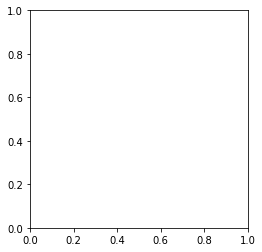

In [80]:
print(LR_C_Uni)

result = numpy.array([edit_uni, edit_bi, edit_tri])


fig, ax = plt.subplots()
im = ax.imshow(result)

# We want to show all ticks...
ax.set_xticks(numpy.arange(len(cParameter)))
ax.set_yticks(numpy.arange(len(nGram)))
# ... and label them with the respective list entries
ax.set_xticklabels(cParameter)
ax.set_yticklabels(nGram)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(nGram)):
    for j in range(len(cParameter)):
        text = ax.text(j, i, result[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

## 2. No data processing

### 2.1 Unigram

In [30]:
train_x=[comment[0] for comment in train_data]
train_y=[comment[1] for comment in train_data]

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [33]:
print("No data processing Test, Unigram")
crossValidation("LR", X,train_y, 5, 1.0, True)
#LogReg(X,train_y)

No data processing Test, Unigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Train Accuracy =  [0.87515 0.87805 0.87735 0.87565 0.87645]
Avg Train Accuracy =  0.87653
Logistic Regression Cross Validation Accuracy =  [0.8506 0.8454 0.8444 0.844  0.8518]
Avg Validation Accuracy =  0.84724


{'fit_time': array([0.99115705, 0.99589705, 1.1870811 , 0.99713731, 0.96800184]),
 'score_time': array([0.00500417, 0.00402164, 0.00398922, 0.00398922, 0.00399065]),
 'test_score': array([0.8506, 0.8454, 0.8444, 0.844 , 0.8518]),
 'train_score': array([0.87515, 0.87805, 0.87735, 0.87565, 0.87645])}

In [ ]:
crossValidation("LR", X,train_y, 5, 1.0, True)

### 2.2 Bigram

In [23]:
train_x=[comment[0] for comment in train_data]
train_y=[comment[1] for comment in train_data]

vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [24]:
print("No data processing Test, Bigram")
LogReg(X,train_y)

No data processing Test, Bigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.9329  0.9363  0.93415 0.9335  0.9337 ]
Avg Train Accuracy =  0.9341100000000001
LR Cross Validation Accuracy =  [0.8456 0.836  0.8378 0.8404 0.8388]
Avg Validation Accuracy =  0.83972


In [ ]:
SVM(X, train_y)

### 2.3 Trigram

In [25]:
train_x=[comment[0] for comment in train_data]
train_y=[comment[1] for comment in train_data]

vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [26]:
print("No data processing Test, Trigram")
LogReg(X,train_y)

No data processing Test, Trigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.98035 0.98145 0.9811  0.9785  0.97925]
Avg Train Accuracy =  0.9801300000000002
LR Cross Validation Accuracy =  [0.7958 0.7972 0.7884 0.7874 0.7808]
Avg Validation Accuracy =  0.7899200000000001


In [ ]:
SVM(X, train_y)

### 2.4 Allgram

In [27]:
train_x=[comment[0] for comment in train_data]
train_y=[comment[1] for comment in train_data]

vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [28]:
print("No data processing Test, Allgram")
LogReg(X,train_y)

No data processing Test, Allgram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.9085  0.9082  0.9079  0.9072  0.90545]
Avg Train Accuracy =  0.9074500000000001
LR Cross Validation Accuracy =  [0.8556 0.8474 0.8456 0.8456 0.854 ]
Avg Validation Accuracy =  0.84964


In [ ]:
SVM(X, train_y)

## 3. TF * IDF

### 3.1 Unigram

In [29]:
train_x=[comment[0] for comment in train_data]
train_y=[comment[1] for comment in train_data]

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=True)
X = tfidf_transformer.fit_transform(X)

In [30]:
print("TF * IDF, Unigram")
LogReg(X,train_y)

TF * IDF, Unigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.98965 0.9915  0.99145 0.99045 0.9902 ]
Avg Train Accuracy =  0.9906499999999999
LR Cross Validation Accuracy =  [0.8648 0.8318 0.8442 0.8542 0.8648]
Avg Validation Accuracy =  0.85196


## 3. Extending Abbr. and All Lower Cases

In [49]:
extended = extendSentences(train_data)

Start extending sentences
[=================== ] 99%
Complete extending sentences


### 3.1 Unigram

In [50]:
train_x=[comment[0] for comment in extended]
train_y=[comment[1] for comment in extended]

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [51]:
print("Extending Abbr. and Unigram Test")
LogReg(X,train_y)

Extending Abbr. and Unigram Test


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.87455 0.87815 0.8771  0.87505 0.87445]
Avg Train Accuracy =  0.87586
LR Cross Validation Accuracy =  [0.85   0.844  0.8422 0.845  0.8522]
Avg Validation Accuracy =  0.8466799999999999


In [ ]:
SVM(X, train_y)

### 3.2 Bigram

In [52]:
train_x=[comment[0] for comment in extended]
train_y=[comment[1] for comment in extended]

vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [53]:
print("Extending Abbr. and Bigram Test")
LogReg(X,train_y)

Extending Abbr. and Bigram Test


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.9297  0.93135 0.9309  0.92865 0.9294 ]
Avg Train Accuracy =  0.93
LR Cross Validation Accuracy =  [0.8438 0.8364 0.8382 0.8398 0.836 ]
Avg Validation Accuracy =  0.83884


In [ ]:
SVM(X, train_y)

### 3.3 Trigram

In [54]:
train_x=[comment[0] for comment in extended]
train_y=[comment[1] for comment in extended]

vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [55]:
print("Extending Abbr. and Trigram Test")
LogReg(X,train_y)

Extending Abbr. and Trigram Test


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.9775  0.97865 0.9776  0.9758  0.97615]
Avg Train Accuracy =  0.97714
LR Cross Validation Accuracy =  [0.804  0.7966 0.7928 0.7926 0.7892]
Avg Validation Accuracy =  0.79504


In [ ]:
SVM(X, train_y)

### 3.4 All-gram

In [56]:
train_x=[comment[0] for comment in extended]
train_y=[comment[1] for comment in extended]

vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [57]:
print("Extending Abbr. and Allgram Test")
LogReg(X,train_y)

Extending Abbr. and Allgram Test


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.906   0.90595 0.9065  0.906   0.9046 ]
Avg Train Accuracy =  0.90581
LR Cross Validation Accuracy =  [0.853  0.8476 0.847  0.8456 0.8534]
Avg Validation Accuracy =  0.84932


In [ ]:
SVM(X, train_y)

## 4 Extended Abbr. Without Stopwords and Punctuations

In [64]:
extend_withoutStopwordsAndPunctions = removePunctuationAndStopwords(extended, additionalStopwords=['br'])

Start removing punctuation and stopwords
[=================== ] 99%
Complete removing punctuation and stopwords


### 4.1 Unigram

In [66]:
train_x=[comment[0] for comment in extend_withoutStopwordsAndPunctions]
train_y=[comment[1] for comment in extend_withoutStopwordsAndPunctions]

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [67]:
print("Extended Abbr. Without Stopwords and Punctuations, unigram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords and Punctuations, unigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.9114  0.91475 0.91325 0.91255 0.9107 ]
Avg Train Accuracy =  0.91253
LR Cross Validation Accuracy =  [0.8634 0.8574 0.8526 0.8584 0.8676]
Avg Validation Accuracy =  0.8598800000000001


In [ ]:
SVM(X, train_y)

### 4.2 Bigram

In [69]:
train_x=[comment[0] for comment in extend_withoutStopwordsAndPunctions]
train_y=[comment[1] for comment in extend_withoutStopwordsAndPunctions]

vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [70]:
print("Extended Abbr. Without Stopwords and Punctuations, Bigram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords and Punctuations, Bigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.9824  0.9836  0.9823  0.9816  0.98215]
Avg Train Accuracy =  0.98241
LR Cross Validation Accuracy =  [0.7954 0.7806 0.7828 0.797  0.7932]
Avg Validation Accuracy =  0.7898000000000001


In [ ]:
SVM(X, train_y)

### 4.3 Trigram

In [71]:
train_x=[comment[0] for comment in extend_withoutStopwordsAndPunctions]
train_y=[comment[1] for comment in extend_withoutStopwordsAndPunctions]

vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [72]:
print("Extended Abbr. Without Stopwords and Punctuations, Trigram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords and Punctuations, Trigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.9996  0.99965 0.9995  0.9996  0.9995 ]
Avg Train Accuracy =  0.9995700000000001
LR Cross Validation Accuracy =  [0.683  0.6686 0.6474 0.6776 0.6642]
Avg Validation Accuracy =  0.66816


In [ ]:
SVM(X, train_y)

### 4.4 Allgram

In [73]:
train_x=[comment[0] for comment in extend_withoutStopwordsAndPunctions]
train_y=[comment[1] for comment in extend_withoutStopwordsAndPunctions]

vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [74]:
print("Extended Abbr. Without Stopwords and Punctuations, Allgram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords and Punctuations, Allgram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.93305 0.935   0.93425 0.9334  0.9319 ]
Avg Train Accuracy =  0.93352
LR Cross Validation Accuracy =  [0.8582 0.8536 0.8448 0.8524 0.861 ]
Avg Validation Accuracy =  0.8539999999999999


In [ ]:
SVM(X, train_y)

## 5 Extended Abbr. Without Stopwords and Punctuations and Lemmatized

In [81]:
lemmatized = lemmatize(extend_withoutStopwordsAndPunctions)

Start lemmatizing
[=================== ] 99%
Complete lemmatizing


### 5.1 Unigram

In [83]:
train_x=[comment[0] for comment in lemmatized]
train_y=[comment[1] for comment in lemmatized]

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [84]:
print("Extended Abbr. Without Stopwords and Punctuations and Lemmatized, Unigram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords and Punctuations and Lemmatized, Unigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.90855 0.91175 0.91045 0.90895 0.9082 ]
Avg Train Accuracy =  0.90958
LR Cross Validation Accuracy =  [0.8626 0.8558 0.85   0.856  0.8606]
Avg Validation Accuracy =  0.857


In [ ]:
SVM(X, train_y)

### 5.2 Bigram

In [85]:
train_x=[comment[0] for comment in lemmatized]
train_y=[comment[1] for comment in lemmatized]

vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [87]:
print("Extended Abbr. Without Stopwords and Punctuations and Lemmatized, Bigram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords and Punctuations and Lemmatized, Bigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.97755 0.9785  0.977   0.97685 0.97875]
Avg Train Accuracy =  0.97773
LR Cross Validation Accuracy =  [0.7924 0.77   0.7716 0.7922 0.7932]
Avg Validation Accuracy =  0.78388


In [ ]:
SVM(X, train_y)

### 5.3 Trigram

In [88]:
train_x=[comment[0] for comment in lemmatized]
train_y=[comment[1] for comment in lemmatized]

vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [90]:
print("Extended Abbr. Without Stopwords and Punctuations and Lemmatized, Trigram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords and Punctuations and Lemmatized, Trigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.999   0.99885 0.99895 0.99915 0.9988 ]
Avg Train Accuracy =  0.9989500000000001
LR Cross Validation Accuracy =  [0.663  0.6524 0.64   0.666  0.6526]
Avg Validation Accuracy =  0.6548


In [ ]:
SVM(X, train_y)

### 5.4 Allgram

In [91]:
train_x=[comment[0] for comment in lemmatized]
train_y=[comment[1] for comment in lemmatized]

vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [92]:
print("Extended Abbr. Without Stopwords and Punctuations and Lemmatized, allgram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords and Punctuations and Lemmatized, allgram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.93105 0.9331  0.93175 0.9306  0.9293 ]
Avg Train Accuracy =  0.93116
LR Cross Validation Accuracy =  [0.855  0.85   0.8448 0.8508 0.8586]
Avg Validation Accuracy =  0.8518399999999999


In [ ]:
SVM(X, train_y)

## 6 Extended Abbr. Without Stopwords, Punctuations and duplicates, and Lemmatized

In [102]:
noDuplicates = removeDuplicates(lemmatized)

Start removing duplicates
[=================== ] 99%
Complete removing duplicates


### 6.1 Unigram

In [103]:
train_x=[comment[0] for comment in noDuplicates]
train_y=[comment[1] for comment in noDuplicates]

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [104]:
print("Extended Abbr. Without Stopwords, Punctuations and duplicates, and Lemmatized, unigram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords, Punctuations and duplicates, and Lemmatized, unigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.9131  0.91605 0.9146  0.9125  0.91075]
Avg Train Accuracy =  0.9134
LR Cross Validation Accuracy =  [0.8662 0.8652 0.8654 0.8668 0.8724]
Avg Validation Accuracy =  0.8672000000000001


In [ ]:
SVM(X, train_y)

### 6.2 Bigram

In [105]:
train_x=[comment[0] for comment in noDuplicates]
train_y=[comment[1] for comment in noDuplicates]

vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [106]:
print("Extended Abbr. Without Stopwords, Punctuations and duplicates, and Lemmatized, bigram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords, Punctuations and duplicates, and Lemmatized, bigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.9882  0.9881  0.98885 0.9876  0.9883 ]
Avg Train Accuracy =  0.9882099999999999
LR Cross Validation Accuracy =  [0.7654 0.7532 0.7556 0.761  0.7682]
Avg Validation Accuracy =  0.76068


In [ ]:
SVM(X, train_y)

### 6.3 Trigram

In [107]:
train_x=[comment[0] for comment in noDuplicates]
train_y=[comment[1] for comment in noDuplicates]

vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [108]:
print("Extended Abbr. Without Stopwords, Punctuations and duplicates, and Lemmatized, trigram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords, Punctuations and duplicates, and Lemmatized, trigram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.99935 0.9992  0.99925 0.99955 0.9994 ]
Avg Train Accuracy =  0.99935
LR Cross Validation Accuracy =  [0.637  0.6176 0.6068 0.628  0.6316]
Avg Validation Accuracy =  0.6242


In [ ]:
SVM(X, train_y)

### 6.4 Allgram

In [109]:
train_x=[comment[0] for comment in noDuplicates]
train_y=[comment[1] for comment in noDuplicates]

vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(train_x)

tfidf_transformer = TfidfTransformer(use_idf=False)
X = tfidf_transformer.fit_transform(X)

In [110]:
print("Extended Abbr. Without Stopwords, Punctuations and duplicates, and Lemmatized, alligram")
LogReg(X,train_y)

Extended Abbr. Without Stopwords, Punctuations and duplicates, and Lemmatized, alligram


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Train Accuracy =  [0.9381  0.9396  0.93935 0.9377  0.93645]
Avg Train Accuracy =  0.9382400000000001
LR Cross Validation Accuracy =  [0.859  0.8566 0.8578 0.8598 0.8624]
Avg Validation Accuracy =  0.8591200000000001


In [ ]:
SVM(X, train_y)

## 2. Determine Parameters

In [29]:
def selectLGParameters(dataSet,leastNgram, mostNgram, tfidf):
    bestScore = 0
    bestC = 0
    output = list()
    for i in range(100):
        
        #crossValidation("LR", X,y_train, fold, c, train_score):
        
        train_set,valid_set=sklearn.model_selection.train_test_split(dataSet,train_size=0.8,test_size=0.2,shuffle=True)
        
        train_x=[comment[0] for comment in train_set]
        train_y=[comment[1] for comment in train_set]
        valid_x=[comment[0] for comment in valid_set]
        valid_y=[comment[1] for comment in valid_set]

        vectorizer = CountVectorizer(ngram_range=(leastNgram, mostNgram))
        X = vectorizer.fit_transform(train_x)

        tfidf_transformer = TfidfTransformer(use_idf=tfidf)
        X = tfidf_transformer.fit_transform(X)
    
        lg=LogisticRegression(C=1)
        lg.fit(X,train_y)
        X_valid=vectorizer.transform(valid_x)
        valid_pred=lg.predict(X_valid)
        score = sklearn.metrics.accuracy_score(valid_y, valid_pred)
        if score > bestScore:
            bestC = i
        print("C = ", 1+i, ", Accuracy = ", score)
        output.append([bestC, bestScore])
    print("Best LR C = ", bestC, "\nAccuracy = ", bestScore)
    return output

In [61]:
extended = extendSentences(train_data)
extend_withoutStopwordsAndPunctions = removePunctuationAndStopwords(extended, additionalStopwords=['br'])
lemmatized = lemmatize(extend_withoutStopwordsAndPunctions)
noDuplicates = removeDuplicates(lemmatized)

Start extending sentences
[=================== ] 99%
Complete extending sentences
Start removing punctuation and stopwords
[=================== ] 99%
Complete removing punctuation and stopwords
Start lemmatizing
[=================== ] 99%
Complete lemmatizing
Start removing duplicates
[=================== ] 99%
Complete removing duplicates


In [50]:
result = selectLGParameters(train_data,1, 1, False)

C =  1 , Accuracy =  0.846
C =  2 , Accuracy =  0.8706
C =  3 , Accuracy =  0.8696
C =  4 , Accuracy =  0.8794
C =  5 , Accuracy =  0.8846
C =  6 , Accuracy =  0.877
C =  7 , Accuracy =  0.8858
C =  8 , Accuracy =  0.8834
C =  9 , Accuracy =  0.8828
C =  10 , Accuracy =  0.8872
C =  11 , Accuracy =  0.8798
C =  12 , Accuracy =  0.8888
C =  13 , Accuracy =  0.8858
C =  14 , Accuracy =  0.8822
C =  15 , Accuracy =  0.887
C =  16 , Accuracy =  0.8838
C =  17 , Accuracy =  0.8924
C =  18 , Accuracy =  0.8844
C =  19 , Accuracy =  0.8774
C =  20 , Accuracy =  0.8896
C =  21 , Accuracy =  0.878
C =  22 , Accuracy =  0.8882
C =  23 , Accuracy =  0.889
C =  24 , Accuracy =  0.8838
C =  25 , Accuracy =  0.8968
C =  26 , Accuracy =  0.8842
C =  27 , Accuracy =  0.8864
C =  28 , Accuracy =  0.8848
C =  29 , Accuracy =  0.882
C =  30 , Accuracy =  0.8802
C =  31 , Accuracy =  0.884
C =  32 , Accuracy =  0.8944
C =  33 , Accuracy =  0.8908
C =  34 , Accuracy =  0.8846
C =  35 , Accuracy =  0.8846
C

# Competition

In [ ]:
def LR(X,y_train,x_valid,y_valid, c):
    lg=LogisticRegression(C=c)
    lg.fit(X,y_train)
    X_valid=vectorizer.transform(x_valid)
    valid_pred=lg.predict(X_valid)
    print ("LR Accuracy: ", sklearn.metrics.accuracy_score(y_valid, valid_pred))
    print (sklearn.metrics.confusion_matrix(y_valid, valid_pred, labels=[1, 0]))

In [71]:
#test_data=load_test()
#extended = extendSentences(test_data)
#extend_withoutStopwordsAndPunctions = removePunctuationAndStopwords(extended, additionalStopwords=['br'])
#lemmatized = lemmatize(extend_withoutStopwordsAndPunctions)
#noDuplicates = removeDuplicates(lemmatized)

total_train_x=[comment[0] for comment in train_data]
total_train_y=[comment[1] for comment in train_data]

test_x=[comment[0] for comment in test_data]
test_id=[comment[1] for comment in test_data]
vectorizer = CountVectorizer(ngram_range=(1, 3))
tfidf_transformer = TfidfTransformer(use_idf=False)


In [76]:
train_X=vectorizer.fit_transform(total_train_x)
train_X=tfidf_transformer.fit_transform(train_X)
lg=LogisticRegression(C=100)
lg.fit(train_X,total_train_y)
X_valid=vectorizer.transform(test_x)
X_valid=train_X=tfidf_transformer.fit_transform(X_valid)
y_pred=lg.predict(X_valid)


df=pd.DataFrame(data={'Id':test_id,'Category':y_pred},columns=['Id','Category'])
df.to_csv('D:\\McGill\\19Fall\\COMP 551\\Projects\\Project2\\comp-551-imbd-sentiment-classification\\LR.csv')